<a href="https://colab.research.google.com/github/YoofKhaneja/Heart_Disease_Prediction/blob/master/Codes/NN_drop_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing standard libraries

In [0]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

# Seeding values
### This is done so that code values stay uniform

In [0]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(0)

# Reading the data into a dataframe

In [3]:
url = 'https://raw.githubusercontent.com/YoofKhaneja/Heart_Disease_Prediction/master/Codes/framingham.csv'
hd = pd.read_csv(url)
hd.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


# Data exploration

In [4]:
print('Total patients: ', hd.shape[0])
print('Total attributes: ', hd.shape[1] - 1)
print('Number of labels: ', 1, '(', hd.columns[15], ')')

Total patients:  4240
Total attributes:  15
Number of labels:  1 ( TenYearCHD )


In [5]:
hd.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


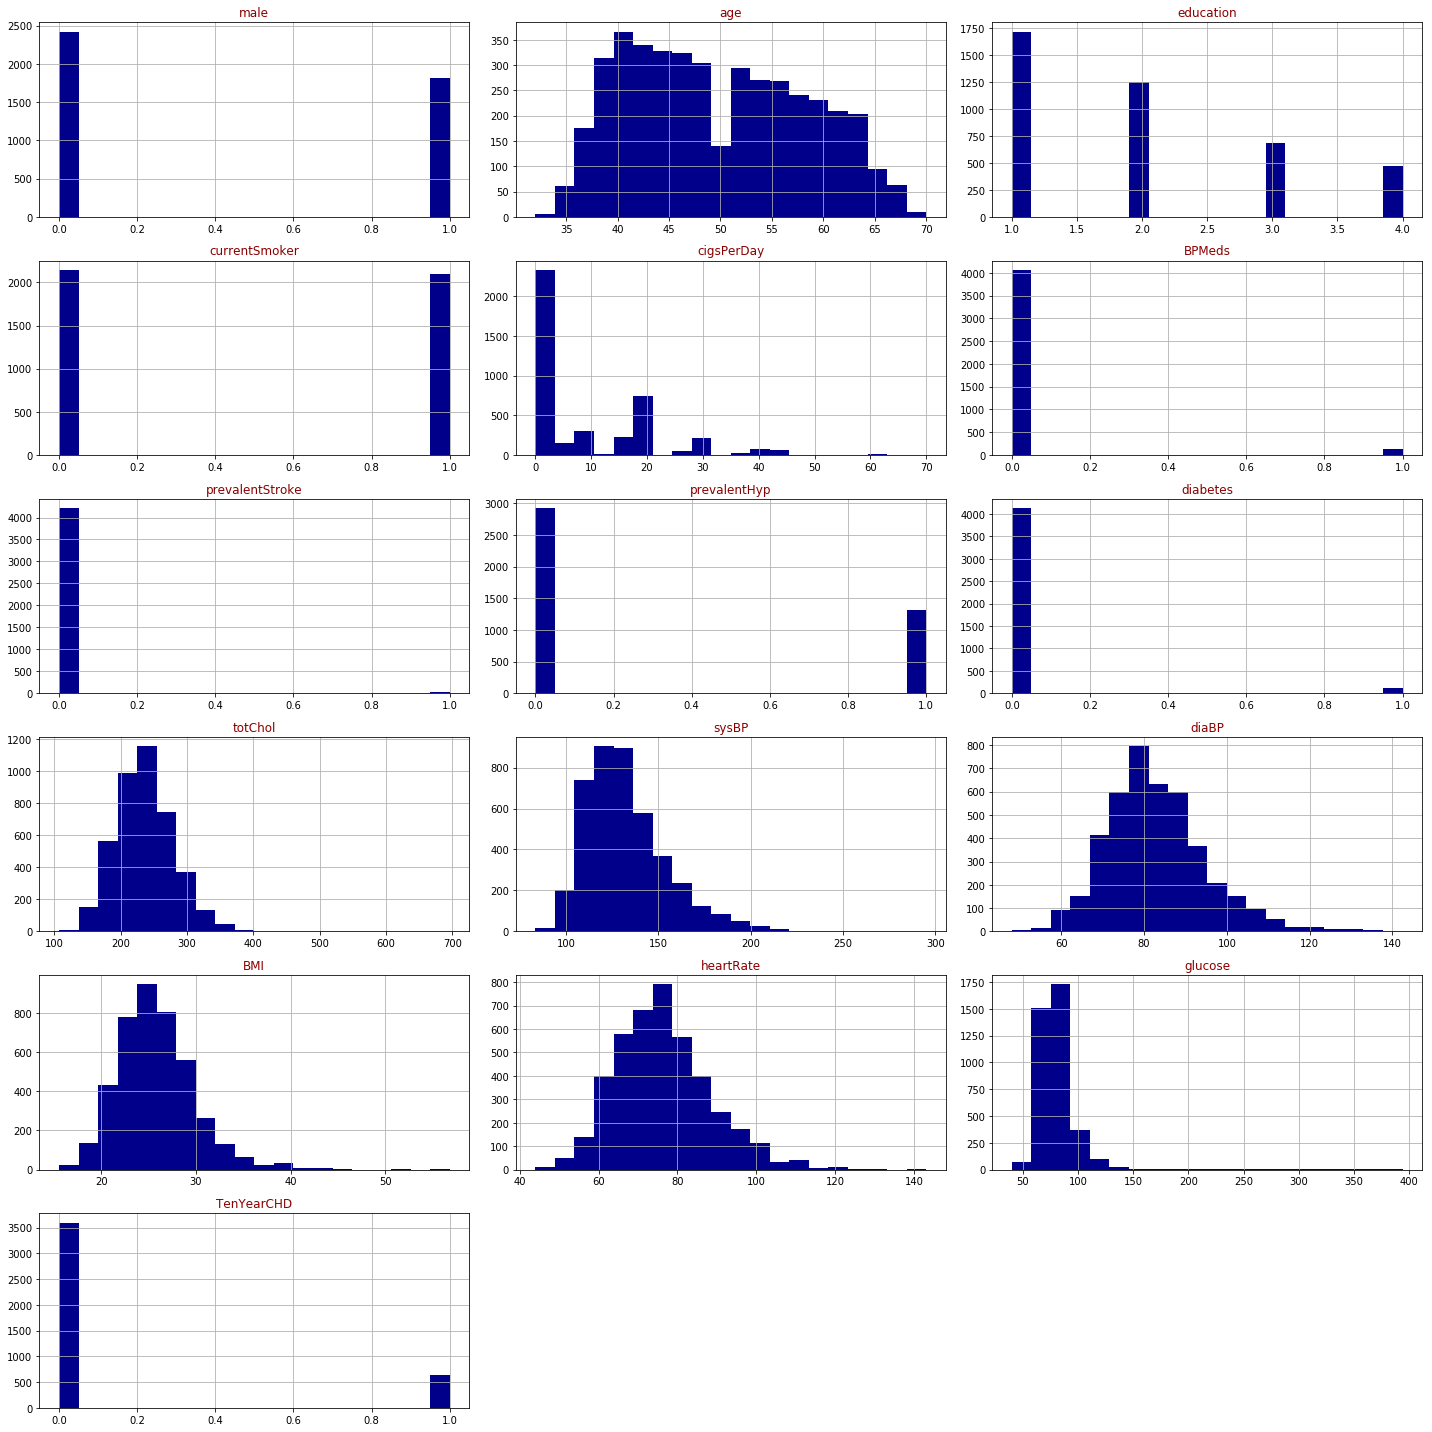

In [6]:
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize = (20, 20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins = 20, ax = ax, facecolor = 'DarkBlue')
        ax.set_title(feature, color = 'DarkRed')
    fig.tight_layout()  
    plt.show()
draw_histograms(hd, hd.columns, 6, 3)

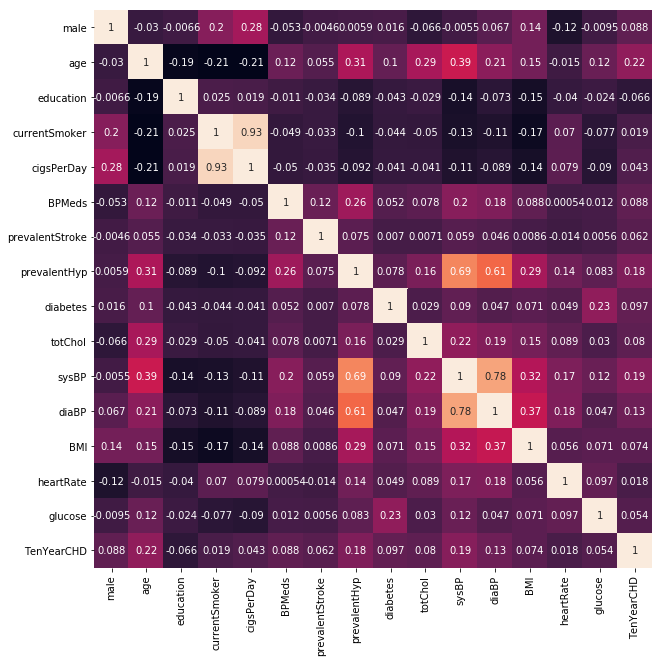

In [7]:
corr = hd.corr(method = 'spearman')
plt.figure(figsize = (10, 16))
sns.heatmap(corr, square = True, cbar = False, annot = True)

Total patients at risk of CHD:  644
Total patients not at risk of CHD:  3596


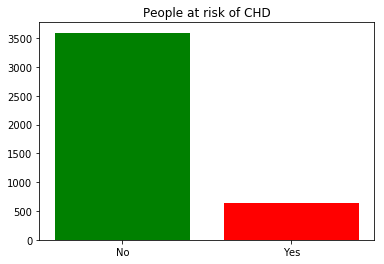

In [8]:
from collections import Counter
chdc = Counter(hd['TenYearCHD'])
print('Total patients at risk of CHD: ', chdc[1])
print('Total patients not at risk of CHD: ', chdc[0])
plt.bar(list(chdc.keys()), chdc.values(), color = ['g', 'r'])
plt.xticks(list(chdc.keys()), ['No', 'Yes'])
plt.title('People at risk of CHD')
plt.show()

In [9]:
print('Missing values: ')
print(hd.isnull().sum())
mv = np.array(hd.isnull().sum())
ta = 0
for t in mv:
    ta += t
print('\nTotal missing attributes: ', ta)
tr = 0
for i in hd.isnull().sum(axis = 1):
    if i > 0:
        tr += 1
print('\nTotal rows with missing data: ', tr)

Missing values: 
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Total missing attributes:  645

Total rows with missing data:  582


# Dropping rows with missing data

In [10]:
hd.dropna(axis = 0, inplace = True)
hd.shape

(3658, 16)

# Creating the training and testing data

In [12]:
hd_ = hd.copy(deep = True)
hd_['age'] = pd.cut(hd_['age'], 
 
                    5, 
                    labels = [1, 2, 3, 4, 5])
hd_['cigsPerDay'] = pd.cut(hd_['cigsPerDay'], 
                           6, 
                           labels = [1, 2, 3, 4, 5, 6])
hd_['totChol'] = pd.cut(hd_['totChol'], 
                        13, 
                        labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
hd_['sysBP'] = pd.cut(hd_['sysBP'], 
                      10, 
                      labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
hd_['diaBP'] = pd.cut(hd_['diaBP'], 
                      8, 
                      labels = [1, 2, 3, 4, 5, 6, 7, 8])
hd_['BMI'] = pd.cut(hd_['BMI'], 
                    10, 
                    labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
hd_['heartRate'] = pd.cut(hd_['heartRate'], 
                          8, 
                          labels = [1, 2, 3, 4, 5, 6, 7, 8])
hd_['glucose'] = pd.cut(hd_['glucose'], 
                        15, 
                        labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

hd_['age'] = hd_['age'].apply(lambda x: round(x*0.2, 2))
hd_['education'] = hd_['education'].apply(lambda x: round(x*0.25, 2))
hd_['cigsPerDay'] = hd_['cigsPerDay'].apply(lambda x: round(x*0.16, 2))
hd_['totChol'] = hd_['totChol'].apply(lambda x: round(x*0.077, 2))
hd_['sysBP'] = hd_['sysBP'].apply(lambda x: round(x*0.1, 2))
hd_['diaBP'] = hd_['diaBP'].apply(lambda x: round(x*0.125, 2))
hd_['BMI'] = hd_['BMI'].apply(lambda x: round(x*0.1, 2))
hd_['heartRate'] = hd_['heartRate'].apply(lambda x: round(x*0.125, 2))
hd_['glucose'] = hd_['glucose'].apply(lambda x: round(x*0.067, 2))

hd_.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,0.2,1.00,0,0.16,0.0,0,0,0,0.23,0.2,0.25,0.3,0.38,0.13,0
1,0,0.4,0.50,0,0.16,0.0,0,0,0,0.31,0.2,0.38,0.4,0.62,0.13,0
2,1,0.6,0.25,1,0.32,0.0,0,0,0,0.31,0.3,0.38,0.3,0.38,0.13,0
3,0,0.8,0.75,1,0.48,0.0,0,1,0,0.23,0.4,0.50,0.4,0.25,0.20,1
4,0,0.4,0.75,1,0.32,0.0,0,0,0,0.39,0.3,0.50,0.2,0.50,0.13,0
5,0,0.4,0.50,0,0.16,0.0,0,1,0,0.31,0.5,0.75,0.4,0.38,0.20,0
6,0,1.0,0.25,0,0.16,0.0,0,0,0,0.23,0.3,0.25,0.5,0.25,0.13,1
7,0,0.4,0.50,1,0.32,0.0,0,0,0,0.46,0.1,0.25,0.2,0.38,0.13,0
8,1,0.6,0.25,0,0.16,0.0,0,1,0,0.31,0.3,0.50,0.3,0.38,0.13,0
9,1,0.4,0.25,1,0.48,0.0,0,1,0,0.23,0.4,0.62,0.2,0.50,0.20,0


In [0]:
attrib = hd_.iloc[:, :-1]
lab = hd_.iloc[:, -1]

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 1)
attrib = np.array(attrib)
lab = np.array(lab)
#print(attrib)
for train_index, test_index in sss.split(attrib, lab):
    x_train, x_test = attrib[train_index], attrib[test_index]
    y_train, y_test = lab[train_index], lab[test_index]

# Creating and compiling the neural network model
### The model contains two hidden layers, each with 256 neurons. Dropout and regularization are applied to ensure that there is no overfitting

In [15]:
from keras import Sequential, regularizers
from keras.layers import Dense, Activation, Dropout
model = Sequential()
model.add(Dense(256, input_dim = 15,
                kernel_initializer = 'truncated_normal', 
                bias_initializer = 'ones',
                activity_regularizer = regularizers.l2(0.01))) 
model.add(Dropout(0.2))
model.add(Activation('relu', name = 'A1'))
model.add(Dense(256,
                kernel_initializer = 'truncated_normal', 
                bias_initializer = 'ones',
                activity_regularizer = regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Activation('relu', name = 'A2'))
model.add(Dense(1,
                kernel_initializer = 'truncated_normal', 
                bias_initializer = 'ones',
                activity_regularizer = regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [16]:
model.compile(optimizer = 'Adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               4096      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
A1 (Activation)              (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
A2 (Activation)              (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
__________

# Defining functions to better understand the training process
### One function prints the average accuracy and loss, the other plots the values for loss and accuracy accross a training session


In [0]:
def stats_avg(history, i):
    val_acc = np.array(history.history['val_acc'])
    val_loss = np.array(history.history['val_loss'])
    model_acc = np.array(history.history['acc'])
    model_loss = np.array(history.history['loss'])
    print('Average validation loss:', val_loss.sum()/i)
    print('Average validation accuracy:', val_acc.sum()/i)
    print('Average loss:', model_loss.sum()/i)
    print('Average accuracy:', model_acc.sum()/i)

In [0]:
def plots(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Training the model

Instructions for updating:
Use tf.cast instead.
Train on 2194 samples, validate on 732 samples
Epoch 1/50
2194/2194 [==============================] - 3s 2ms/step - loss: 27.3949 - acc: 0.3724 - val_loss: 12.6381 - val_acc: 0.1995
Epoch 2/50
2194/2194 [==============================] - 1s 265us/step - loss: 10.0138 - acc: 0.3136 - val_loss: 6.9313 - val_acc: 0.1434
Epoch 3/50
2194/2194 [==============================] - 1s 241us/step - loss: 6.5246 - acc: 0.3113 - val_loss: 5.5794 - val_acc: 0.2609
Epoch 4/50
2194/2194 [==============================] - 1s 236us/step - loss: 5.4082 - acc: 0.3719 - val_loss: 4.7325 - val_acc: 0.1407
Epoch 5/50
2194/2194 [==============================] - 1s 235us/step - loss: 4.8249 - acc: 0.3669 - val_loss: 4.3654 - val_acc: 0.1831
Epoch 6/50
2194/2194 [==============================] - 1s 240us/step - loss: 4.5666 - acc: 0.3642 - val_loss: 4.1961 - val_acc: 0.2404
Epoch 7/50
2194/2194 [==============================] - 1s 239us/step - loss: 4.4099 - a

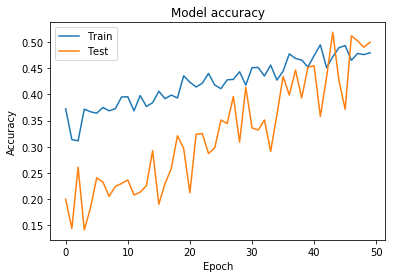

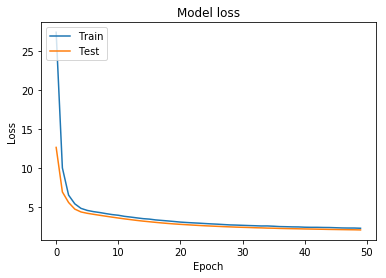

Train on 2194 samples, validate on 732 samples
Epoch 1/50
2194/2194 [==============================] - 1s 245us/step - loss: 2.2509 - acc: 0.4936 - val_loss: 2.0549 - val_acc: 0.4454
Epoch 2/50
2194/2194 [==============================] - 1s 238us/step - loss: 2.2491 - acc: 0.4799 - val_loss: 2.0510 - val_acc: 0.5314
Epoch 3/50
2194/2194 [==============================] - 1s 234us/step - loss: 2.2327 - acc: 0.4913 - val_loss: 2.0353 - val_acc: 0.4645
Epoch 4/50
2194/2194 [==============================] - 1s 239us/step - loss: 2.2276 - acc: 0.4923 - val_loss: 2.0287 - val_acc: 0.4454
Epoch 5/50
2194/2194 [==============================] - 1s 235us/step - loss: 2.1951 - acc: 0.5032 - val_loss: 2.0160 - val_acc: 0.5041
Epoch 6/50
2194/2194 [==============================] - 1s 239us/step - loss: 2.2125 - acc: 0.4809 - val_loss: 2.0043 - val_acc: 0.4358
Epoch 7/50
2194/2194 [==============================] - 1s 232us/step - loss: 2.1916 - acc: 0.4923 - val_loss: 1.9977 - val_acc: 0.4372
E

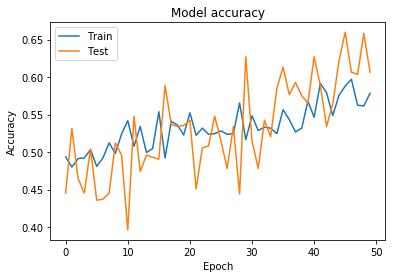

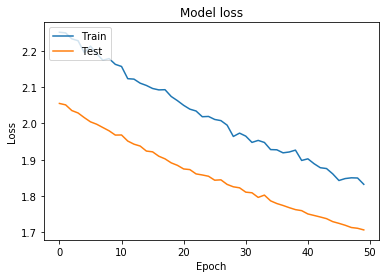

Train on 2194 samples, validate on 732 samples
Epoch 1/50
2194/2194 [==============================] - 1s 250us/step - loss: 1.8328 - acc: 0.5620 - val_loss: 1.6976 - val_acc: 0.6093
Epoch 2/50
2194/2194 [==============================] - 1s 233us/step - loss: 1.8181 - acc: 0.5811 - val_loss: 1.7042 - val_acc: 0.5205
Epoch 3/50
2194/2194 [==============================] - 1s 238us/step - loss: 1.8170 - acc: 0.5775 - val_loss: 1.6890 - val_acc: 0.6120
Epoch 4/50
2194/2194 [==============================] - 1s 234us/step - loss: 1.8105 - acc: 0.5542 - val_loss: 1.6843 - val_acc: 0.6202
Epoch 5/50
2194/2194 [==============================] - 1s 236us/step - loss: 1.8110 - acc: 0.5784 - val_loss: 1.6778 - val_acc: 0.6202
Epoch 6/50
2194/2194 [==============================] - 1s 230us/step - loss: 1.7974 - acc: 0.5752 - val_loss: 1.6737 - val_acc: 0.6189
Epoch 7/50
2194/2194 [==============================] - 1s 239us/step - loss: 1.7761 - acc: 0.5757 - val_loss: 1.6710 - val_acc: 0.6352
E

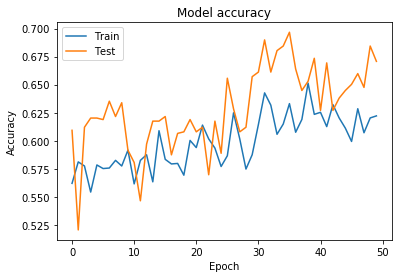

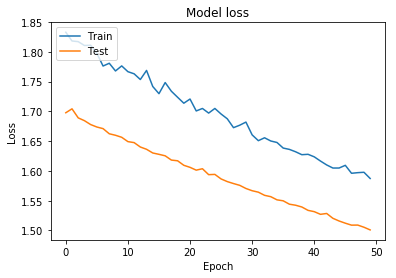

Train on 2194 samples, validate on 732 samples
Epoch 1/50
2194/2194 [==============================] - 1s 243us/step - loss: 1.5809 - acc: 0.6149 - val_loss: 1.4965 - val_acc: 0.6503
Epoch 2/50
2194/2194 [==============================] - 1s 231us/step - loss: 1.5784 - acc: 0.6053 - val_loss: 1.4958 - val_acc: 0.6216
Epoch 3/50
2194/2194 [==============================] - 1s 237us/step - loss: 1.5729 - acc: 0.6203 - val_loss: 1.4926 - val_acc: 0.6448
Epoch 4/50
2194/2194 [==============================] - 1s 246us/step - loss: 1.5717 - acc: 0.6144 - val_loss: 1.4897 - val_acc: 0.6790
Epoch 5/50
2194/2194 [==============================] - 1s 241us/step - loss: 1.5635 - acc: 0.6541 - val_loss: 1.4851 - val_acc: 0.6311
Epoch 6/50
2194/2194 [==============================] - 1s 232us/step - loss: 1.5683 - acc: 0.6240 - val_loss: 1.4816 - val_acc: 0.6434
Epoch 7/50
2194/2194 [==============================] - 1s 244us/step - loss: 1.5623 - acc: 0.6477 - val_loss: 1.4829 - val_acc: 0.6544
E

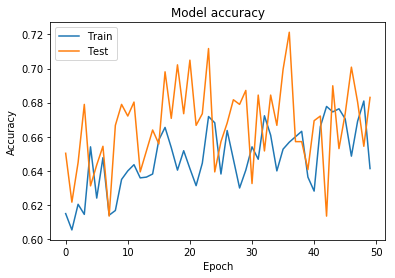

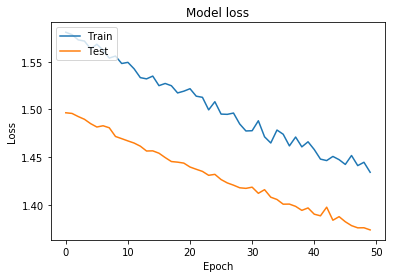

Train on 2194 samples, validate on 732 samples
Epoch 1/50
2194/2194 [==============================] - 1s 259us/step - loss: 1.4341 - acc: 0.6696 - val_loss: 1.3703 - val_acc: 0.6831
Epoch 2/50
2194/2194 [==============================] - 1s 241us/step - loss: 1.4353 - acc: 0.6705 - val_loss: 1.3685 - val_acc: 0.7036
Epoch 3/50
2194/2194 [==============================] - 1s 248us/step - loss: 1.4303 - acc: 0.6582 - val_loss: 1.3695 - val_acc: 0.6489
Epoch 4/50
2194/2194 [==============================] - 1s 245us/step - loss: 1.4275 - acc: 0.6550 - val_loss: 1.3666 - val_acc: 0.6475
Epoch 5/50
2194/2194 [==============================] - 1s 246us/step - loss: 1.4186 - acc: 0.6778 - val_loss: 1.3622 - val_acc: 0.6831
Epoch 6/50
2194/2194 [==============================] - 1s 239us/step - loss: 1.4201 - acc: 0.6737 - val_loss: 1.3610 - val_acc: 0.6967
Epoch 7/50
2194/2194 [==============================] - 1s 244us/step - loss: 1.4241 - acc: 0.6841 - val_loss: 1.3605 - val_acc: 0.7418
E

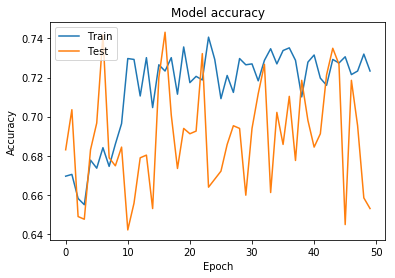

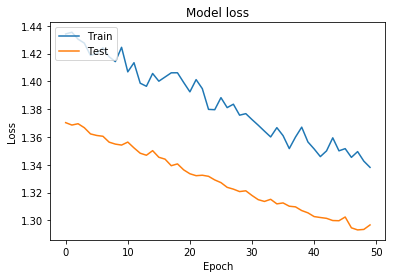

In [19]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_acc', 
                              factor = 0.5,
                              patience = 1, min_lr = 0.0001)
class_weights = {0:1.0, 1:5.0}
for i in range(5):    
    history = model.fit(x_train, y_train, 
          validation_split = 0.25, 
          batch_size = 16, 
          epochs = 50,
          verbose = 1,
          callbacks = [reduce_lr],
          class_weight = class_weights)
    stats_avg(history, i = 50)
    plots(history)
    

# Testing and evaluating the model

In [0]:
y_pred = model.predict(x_test)
y_pred = (y_pred >= 0.5)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted: 0', 'Predicted: 1'], 
                           index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, y_pred))
conf_matrix

Accuracy: 0.674863387978142


,Predicted: 0,Predicted: 1
Actual:0,413,208
Actual:1,30,81


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78       621
           1       0.28      0.73      0.41       111

    accuracy                           0.67       732
   macro avg       0.61      0.70      0.59       732
weighted avg       0.83      0.67      0.72       732

